<a href="https://colab.research.google.com/github/sisomimoctrl/study-tensorflow/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

print(tf.__version__)

2.8.2


In [2]:
from tensorflow.keras.datasets import mnist

(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [3]:
print(train_data.shape, test_data.shape)
print(type(train_data), type(test_data))
print(type(train_data[0]), type(test_data[0]))

(60000, 28, 28) (10000, 28, 28)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


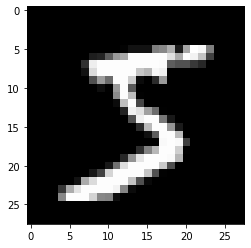

In [4]:
import matplotlib.pyplot as plt

plt.imshow(train_data[0], cmap='gray')
plt.show()

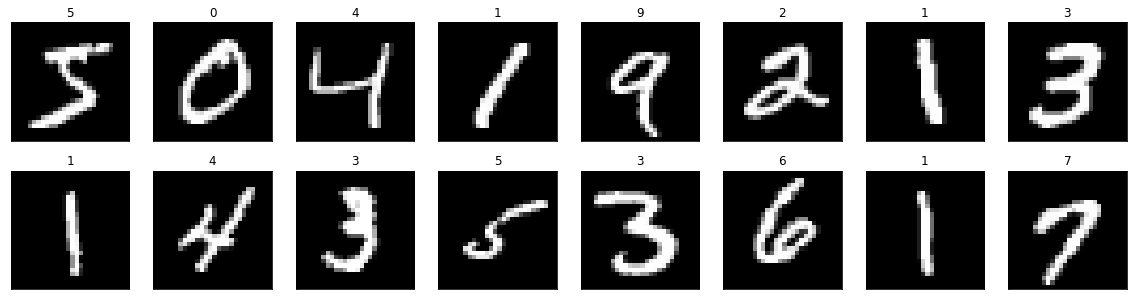

In [5]:
plt.figure(figsize=(20,5))
for i in range(16):
    plt.subplot(2, 8, 1+i)
    plt.title(train_labels[i])
    plt.imshow(train_data[i], cmap='gray')
    plt.xticks([]), plt.yticks([])

plt.show()

In [6]:
X_train = train_data.reshape(-1, 28*28)
X_train = X_train / 255

X_test = test_data.reshape(-1, 28*28)
X_test = X_test / 255

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [7]:
print(train_labels.shape, test_labels.shape)
print(type(train_labels), type(train_labels))
print(type(train_labels[0]), type(test_labels[0]))
print('train_labels : ', train_labels)

(60000,) (10000,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.uint8'> <class 'numpy.uint8'>
train_labels :  [5 0 4 ... 5 6 8]


In [8]:
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [9]:
one_hot_train_labels.shape, one_hot_test_labels.shape

((60000, 10), (10000, 10))

In [10]:
print(one_hot_train_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(784,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
X_val = X_train[:1000]
partial_X_train = X_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
history = model.fit(partial_X_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, y_val))

Epoch 1/20
116/116 [==============================] - 3s 10ms/step - loss: 0.4114 - accuracy: 0.8794 - val_loss: 0.2777 - val_accuracy: 0.9150
Epoch 2/20
116/116 [==============================] - 1s 7ms/step - loss: 0.1634 - accuracy: 0.9514 - val_loss: 0.1639 - val_accuracy: 0.9560
Epoch 3/20
116/116 [==============================] - 1s 6ms/step - loss: 0.1079 - accuracy: 0.9673 - val_loss: 0.1438 - val_accuracy: 0.9570
Epoch 4/20
116/116 [==============================] - 1s 7ms/step - loss: 0.0782 - accuracy: 0.9762 - val_loss: 0.1181 - val_accuracy: 0.9600
Epoch 5/20
116/116 [==============================] - 1s 6ms/step - loss: 0.0591 - accuracy: 0.9815 - val_loss: 0.0883 - val_accuracy: 0.9730
Epoch 6/20
116/116 [==============================] - 1s 7ms/step - loss: 0.0470 - accuracy: 0.9855 - val_loss: 0.0969 - val_accuracy: 0.9700
Epoch 7/20
116/116 [==============================] - 1s 6ms/step - loss: 0.0359 - accuracy: 0.9888 - val_loss: 0.1308 - val_accuracy: 0.9650
Epoch

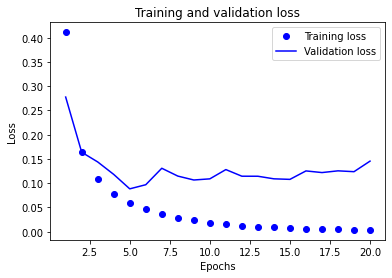

In [15]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

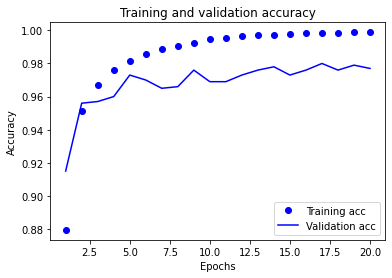

In [16]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [17]:
scores = model.evaluate(X_test, one_hot_test_labels)
print(f'{model.metrics_names[1]} : {scores[1]*100:.2f} %')

313/313 [==============================] - 1s 3ms/step - loss: 0.1002 - accuracy: 0.9801
accuracy : 98.01 %
